In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df=pd.read_csv('../data/전복나이.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


전복의나이를확인하기위해껍질을원뿔모양으로자르고, 염색하고, 현미경으로고리의수를세어확
인해야한다. 

1. 결측치 확인 -> null 없음을 확인함.

In [29]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

2. 요약통계값 확인
rings= 고리의 수 , 50%는 중앙값 mean 평균이랑 달라

In [30]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


3. mode는 최빈값 확인
mode =유사= 50% =유사= mean (평균이 중앙값과 크게 다르지 않다, 중앙값이 최빈값과도 멀지 않다)
=> 분포가 한쪽으로 치우치지 않았다. 정규분포에 '가깝다'고 추정된다.


In [31]:
df.mode()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.550,0.45,0.15,0.2225,0.175,0.1715,0.275,9.0
1,NaN,0.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN


4. 이상치 제거
Height(두께) 값 중에서 0이거나 말이 안되는 값(이상치)을 제거했다는 것을 증명.
제거가 된 게 맞다는 걸 확인했다는게 핵심.

In [32]:
df=df[df.Height>0] # height가 0보다 큰거 남기고 전부 제거 => 조건 필터링
df.Height.min() #남은 값 중에 제일 작은 값

0.01

나이테 수(Rings)에 따른 전복 개수 확인

In [33]:
df.groupby('Rings').count() #링의 값이 같은 전복들끼리 묶어서, 그룹에 데이터가 몇개 있는지 세어라.
#count는 행 개수를 세기 때문에, 한 행 = 한 전복

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
Rings,,,,,,,,
1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1
3,15,15,15,15,15,15,15,15
4,57,57,57,57,57,57,57,57
5,115,115,115,115,115,115,115,115
6,258,258,258,258,258,258,258,258
7,391,391,391,391,391,391,391,391
8,567,567,567,567,567,567,567,567
9,689,689,689,689,689,689,689,689


In [34]:
df.groupby('Rings')['Shucked weight'].mean()

Rings
1     0.001000
2     0.004500
3     0.011767
4     0.024719
5     0.061696
6     0.123413
7     0.182657
8     0.293927
9     0.387938
10    0.447217
11    0.503977
12    0.472781
13    0.434638
14    0.427190
15    0.402471
16    0.421716
17    0.467052
18    0.446833
19    0.440625
20    0.458115
21    0.447464
22    0.405000
23    0.399444
24    0.600250
25    0.426500
26    0.384000
27    0.539000
29    0.705500
Name: Shucked weight, dtype: float64

In [35]:
df.groupby('Rings')[['Shucked weight', 'Whole weight', 'Shell weight']].mean()

,Shucked weight,Whole weight,Shell weight
Rings,,,
1,0.001000,0.002000,0.001500
2,0.004500,0.015000,0.005000
3,0.011767,0.028400,0.008933
4,0.024719,0.059605,0.018000
5,0.061696,0.125500,0.036770
6,0.123413,0.273713,0.077333
7,0.182657,0.397386,0.111648
8,0.293927,0.641128,0.178721
9,0.387938,0.852013,0.236509


array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Whole weight'}>],
       [<Axes: title={'center': 'Shucked weight'}>,
        <Axes: title={'center': 'Viscera weight'}>,
        <Axes: title={'center': 'Shell weight'}>,
        <Axes: title={'center': 'Rings'}>]], dtype=object)

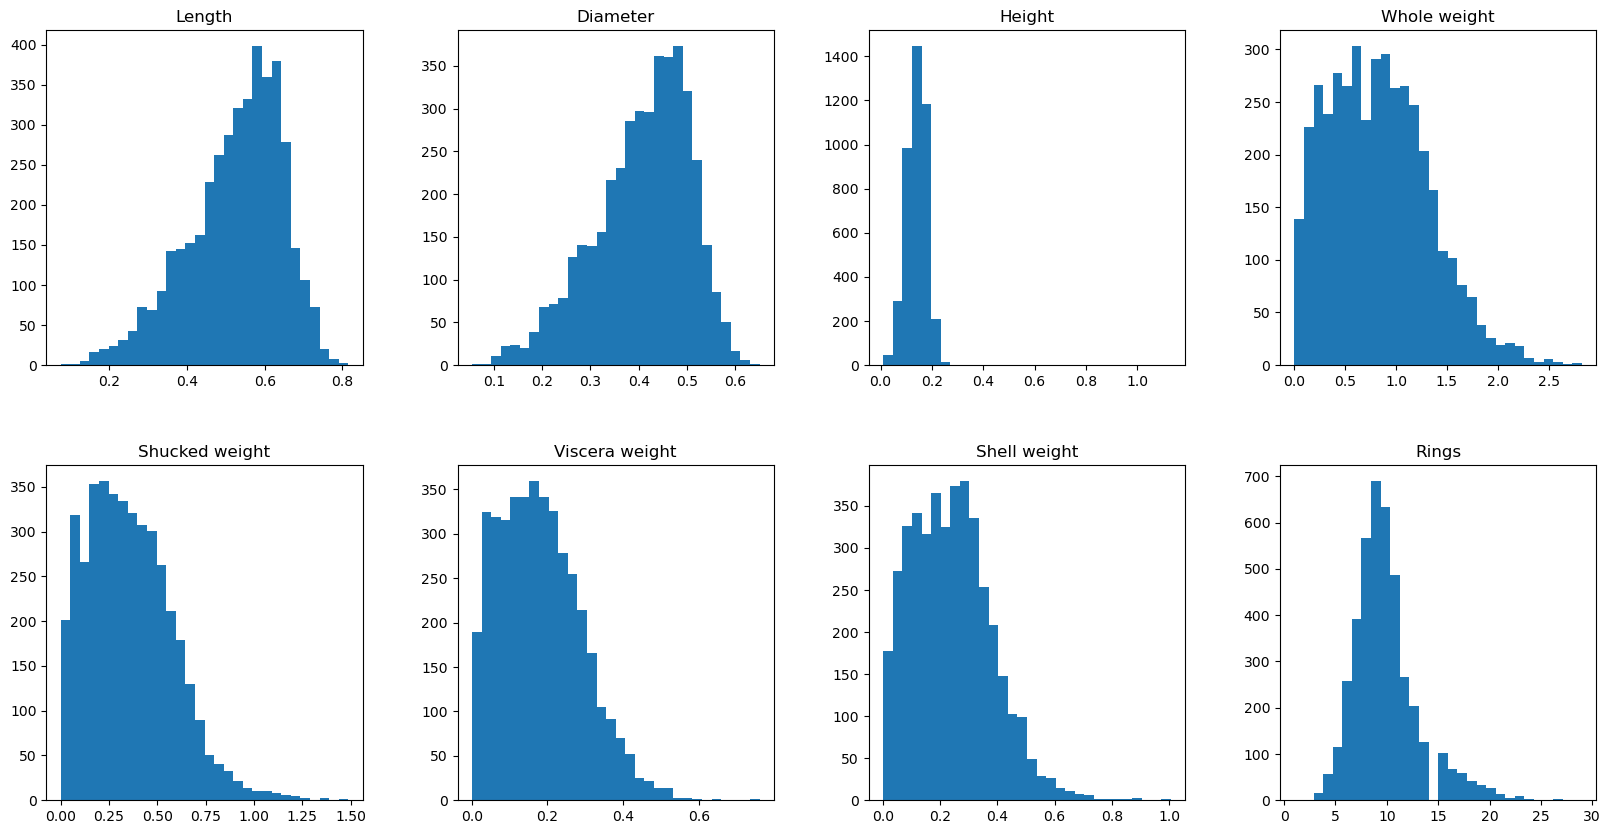

In [36]:
df.hist(figsize=(20,10), grid=False, layout=(2,4), bins=30)

 countplot()으로 성별에 따른 데이터 분포확인

C:\Users\it\AppData\Local\Temp\ipykernel_8840\3613240676.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette="Set3")


<Axes: xlabel='Sex', ylabel='count'>

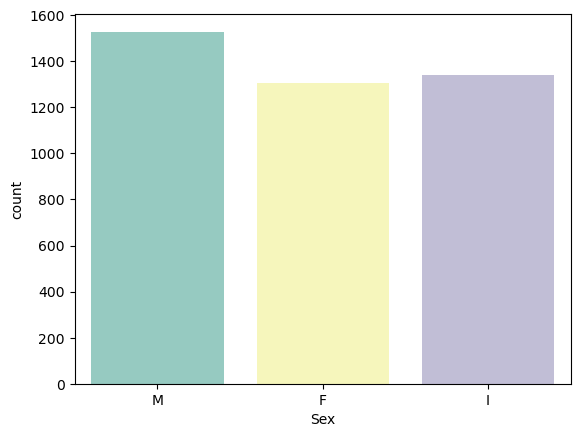

In [37]:
sns.countplot(x='Sex', data=df, palette="Set3")

swarmplot()과 violinplot()으로 성별에 따른 나이 분포 확인

c:\Users\it\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 47.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\it\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 43.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\it\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 49.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Sex', ylabel='Rings'>

c:\Users\it\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\it\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 52.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\it\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 58.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


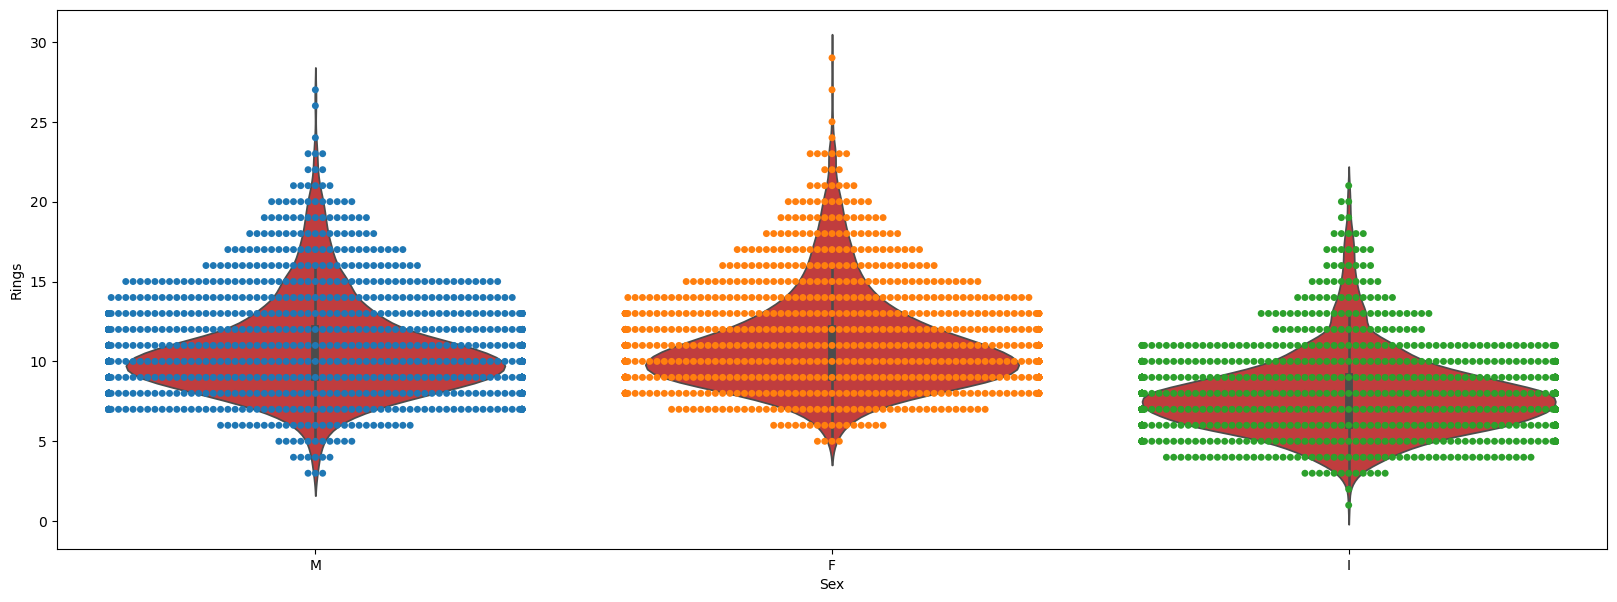

In [38]:
plt.figure(figsize=(20, 7))
sns.swarmplot(x='Sex', y='Rings', data=df, hue='Sex')
sns.violinplot(x='Sex', y='Rings', data=df)

pairplot()으로 각 속성의 변화 확인

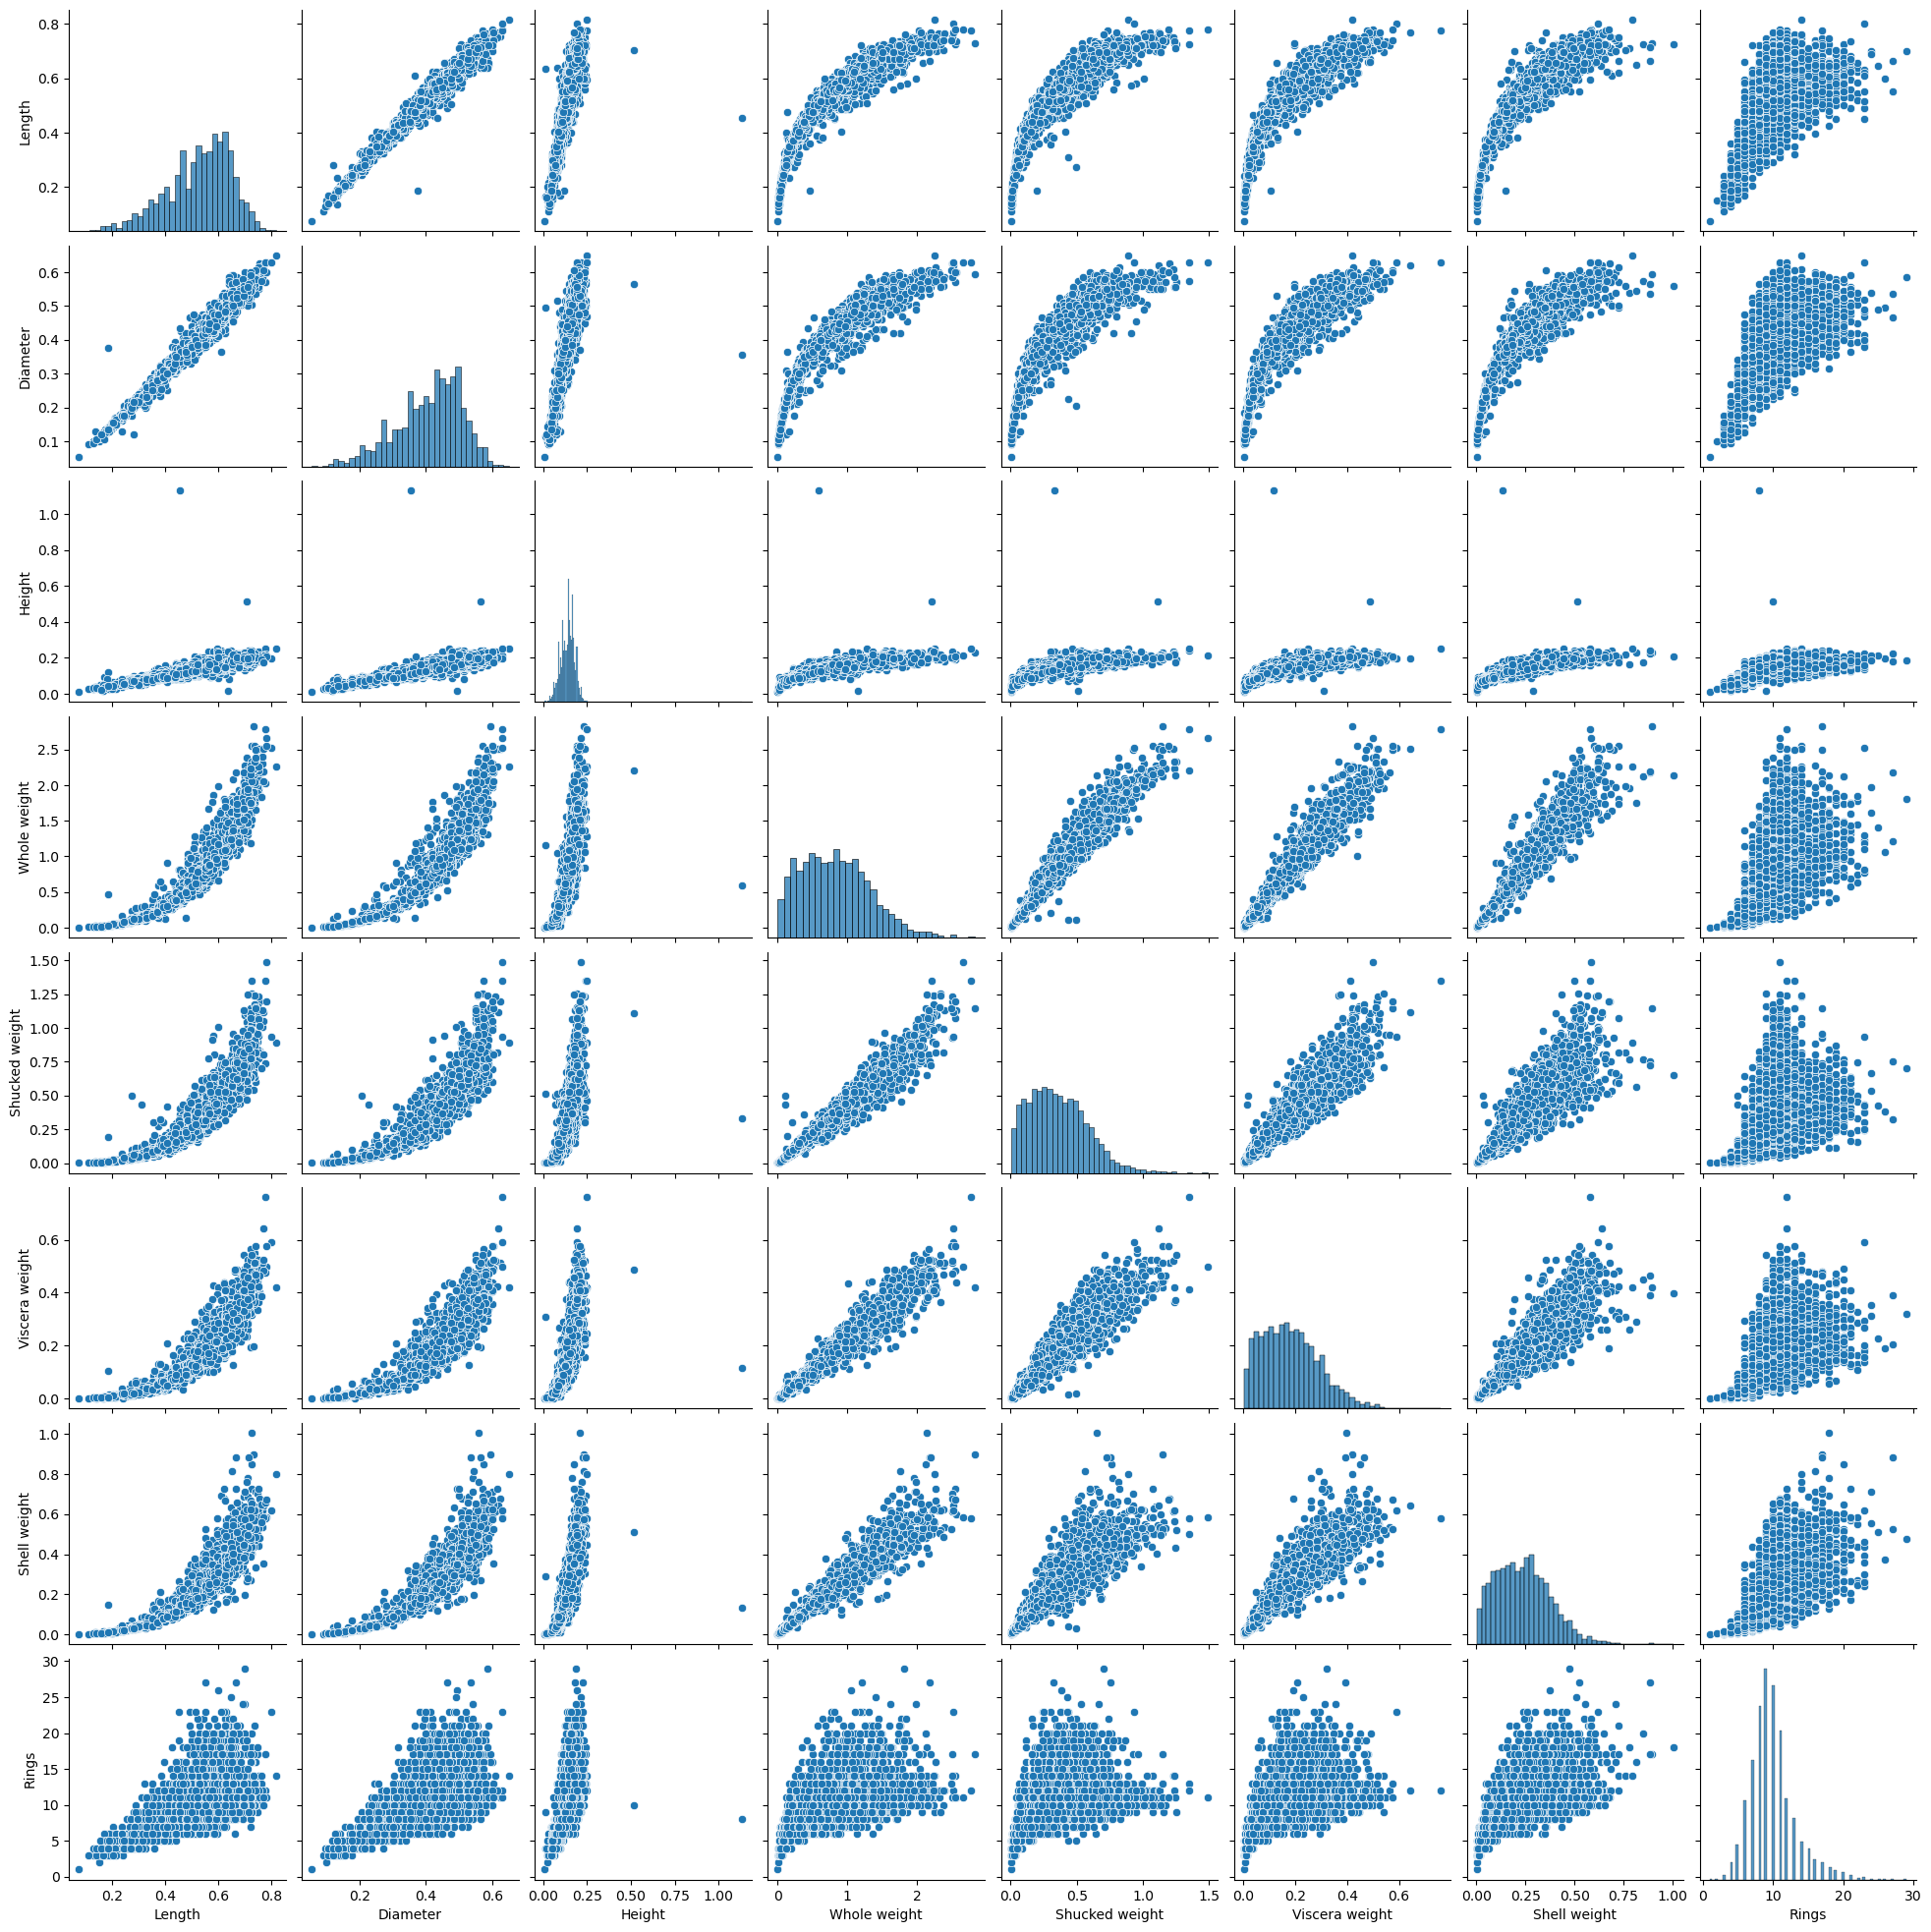

In [39]:
num_features = df.select_dtypes(include=[np.number]).columns
sns.pairplot(df[num_features])

scatterplot()으로 이상치 확인하고 제거

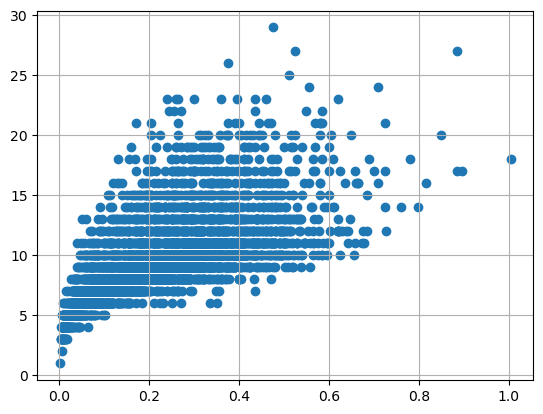

In [40]:
var='Shell weight'
plt.scatter(x=df[var], y=df['Rings'])
plt.grid(True)


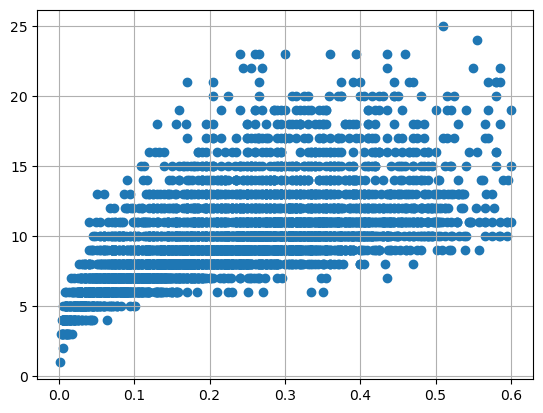

In [41]:
df.drop(df[(df['Shell weight']>0.6) & (df['Rings']<25)].index, inplace=True)
df.drop(df[(df['Shell weight']<0.8) & (df['Rings']>25)].index, inplace=True)
df.drop(df[(df['Shell weight']>0.8) & (df['Rings']>25)].index, inplace=True)
var = 'Shell weight'
plt.scatter(x=df[var], y=df['Rings'])
plt.grid(True)



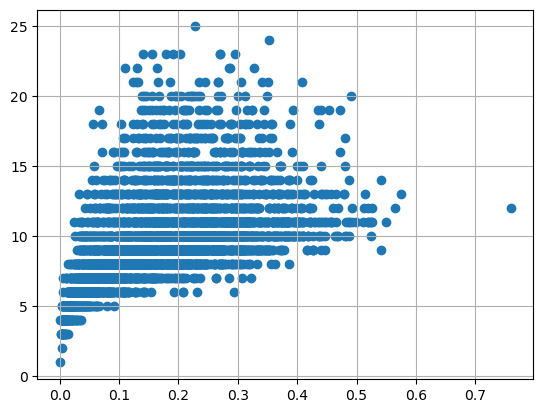

In [42]:
var = 'Viscera weight'
plt.scatter(x=df[var], y=df['Rings'])
plt.grid(True)

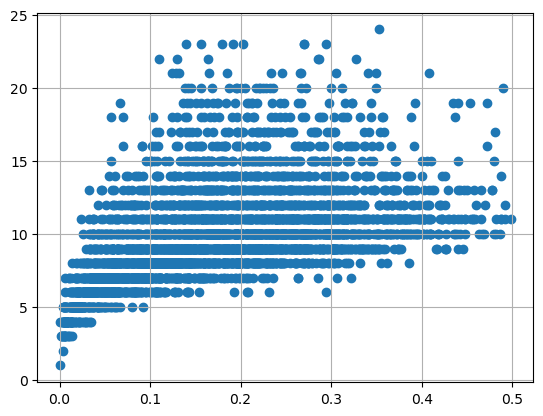

In [43]:
df.drop(df[(df['Viscera weight']>0.5)&(df['Rings']<20)].index, inplace=True)
df.drop(df[(df['Viscera weight']<0.5)&(df['Rings']>=25)].index, inplace=True)
var = 'Viscera weight'
plt.scatter(x=df[var], y=df['Rings'])
plt.grid(True)

In [ ]:
var = 'Shucked weight'
plt.scatter(x = d[var], y=df['Rings'])
plt.grid(True)

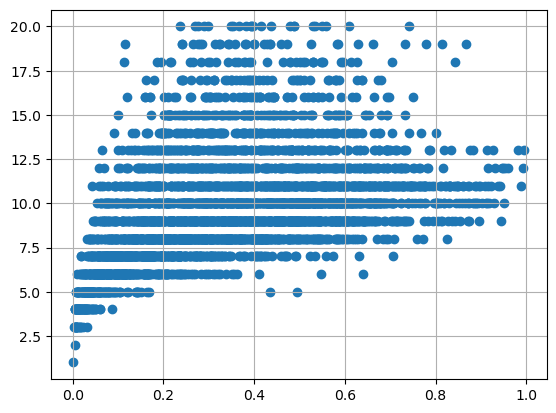

In [44]:
df.drop(df[(df['Shucked weight']>=1) & (df['Rings']<20)].index, inplace=True)
df.drop(df[(df['Shucked weight']<1) & (df['Rings']>20)].index, inplace=True)
var= 'Shucked weight'
plt.scatter(x = df[var], y = df['Rings'])
plt.grid(True)

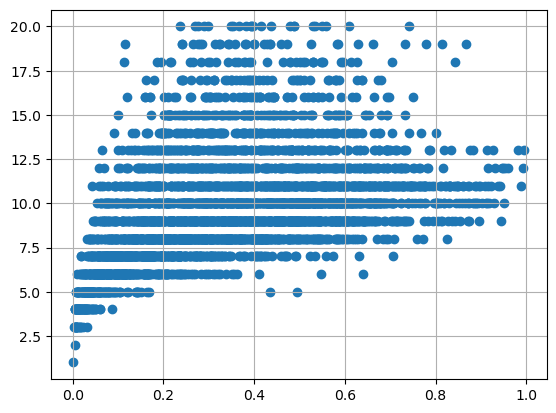

In [45]:
var = 'Shucked weight'
plt.scatter(x=df[var], y=df['Rings'])
plt.grid(True)

In [ ]:
df.drop(df[(df['Whole weight']>2.0)&])